In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report


from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Project 3 : Math 3439/data/IBM HR Data new.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-0e6d7443cb38>:17: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Project 3 : Math 3439/data/IBM HR Data new.csv')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [5]:
df = df.dropna()

In [6]:
df['JobLevel'].unique()


array([2., 4., 5., 1., 3.])

In [7]:
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EmployeeCount                object
EmployeeNumber               object
Application ID               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                   object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               

In [8]:
from sklearn.preprocessing import LabelEncoder
df['JobLevel'] = df['JobLevel'].astype(int)
df['JobInvolvement'] = df['JobInvolvement'].astype(int)

df['DistanceFromHome'] = pd.to_numeric(df['DistanceFromHome'], errors='coerce')
df['HourlyRate'] = pd.to_numeric(df['HourlyRate'], errors='coerce')
df['JobSatisfaction'] = pd.to_numeric(df['JobSatisfaction'], errors='coerce')
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')
df['PercentSalaryHike'] = pd.to_numeric(df['PercentSalaryHike'], errors='coerce')

attrition_le = LabelEncoder()
df['Attrition'] = attrition_le.fit_transform(df['Attrition'])
OverTime_le = LabelEncoder()
df['OverTime'] = OverTime_le.fit_transform(df['OverTime'])
Gender_le = LabelEncoder()
df['Gender'] = OverTime_le.fit_transform(df['Gender'])

# get dummies for: Department, EducationField, Employee Source,  MaritalStatus(3), JobRole
df = pd.concat([df, pd.get_dummies(df['Department'], prefix='Department')], axis=1)
df = pd.concat([df, pd.get_dummies(df['EducationField'], prefix='EducationField')], axis=1)
df = pd.concat([df, pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')], axis=1)
df = pd.concat([df, pd.get_dummies(df['JobRole'], prefix='JobRole')], axis=1)
df = pd.concat([df, pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')], axis=1)

df = df.drop(columns=['JobRole', 'MaritalStatus', 'Employee Source', 'EducationField', 'Department', 'BusinessTravel', 'EmployeeNumber', 'EmployeeCount', 'Application ID', 'Over18'])


In [9]:
df = df.drop_duplicates()

In [10]:
df.isna().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion  

In [11]:
df = df.dropna()

In [12]:
df.select_dtypes(include=['object'])

""
0
1
5
6
13
...
23420
23425
23426
23427


In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.7, stratify=df['Attrition'])

X_train = train_df.drop('Attrition', axis=1)
y_train = train_df['Attrition']

X_test = test_df.drop('Attrition', axis=1)
y_test = test_df['Attrition']

In [14]:
train_df['Attrition'].value_counts(normalize=True)

0    0.836157
1    0.163843
Name: Attrition, dtype: float64

In [15]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=2)

nn.fit(X_train, y_train)

nn.kneighbors(X_train.iloc[0:2])

(array([[0.        , 1.41421356],
        [0.        , 1.        ]]), array([[   0, 4744],
        [   1, 3448]]))

In [16]:
X_test.duplicated().sum() / len(X_test)

0.0

In [17]:
X_train.shape[0]

5725

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Use a grid search with possible neighbors [1, 5, 10, 15, 20, 30] to find which number of neighbors is best. 
knn_clf = KNeighborsClassifier()
knn_params = {'n_neighbors': [1, 5, 10, 15, 20, 30],'metric': ['hamming', 'euclidean']}

grid_search_knn = GridSearchCV(knn_clf, knn_params)
grid_search_knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, grid_search_knn.predict(X_test))
y_pred_probaCV = grid_search_knn.predict_proba(X_test)[:,1]
test_df['knn_preds'] = y_pred_probaCV

# find which number of neighbors is best. 
grid_search_knn.best_params_

{'metric': 'hamming', 'n_neighbors': 1}

In [19]:
print(f'Accuracy: {grid_search_knn.best_score_ *100}')

Accuracy: 89.04803493449782


In [ ]:
# Use a grid search with possible neighbors [1, 5, 10, 15, 20, 30] to find which number of neighbors is best. 
knn_clf = KNeighborsClassifier()
knn_params = {'n_neighbors': [1, 5, 10, 15, 20, 30],'metric': ['hamming', 'euclidean']}

grid_search_knn = GridSearchCV(knn_clf, knn_params)
grid_search_knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, grid_search_knn.predict(X_test))
y_pred_probaCV = grid_search_knn.predict_proba(X_test)[:,1]
test_df['knn_preds'] = y_pred_probaCV

# find which number of neighbors is best. 
grid_search_knn.best_params_

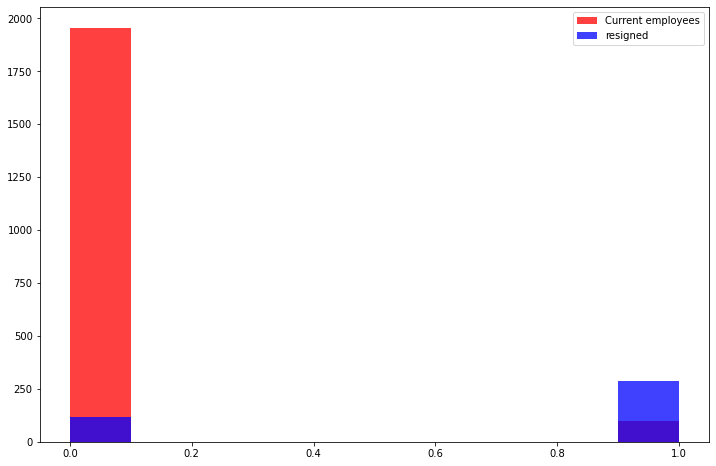

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(test_df[test_df['Attrition'] == 0]['knn_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df[test_df['Attrition'] == 1]['knn_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()
plt.show()

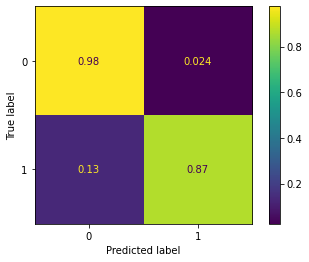

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_search_knn.predict(X_test), normalize='true')
plt.show()

In [21]:
dfwrong = test_df[test_df['Attrition'] != test_df['knn_preds']]
dfwrong

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,knn_preds
1545,18.0,0,287.0,5.0,2.0,1.0,1,73,3,1,...,0,0,0,1,0,0,1,0,0,1.0
7386,28.0,0,1476.0,16.0,2.0,2.0,1,68,4,2,...,0,0,0,0,0,0,0,0,1,1.0
3158,24.0,0,581.0,9.0,3.0,3.0,1,62,4,1,...,0,0,0,1,0,0,0,0,1,1.0
19454,22.0,1,617.0,3.0,1.0,2.0,0,34,3,2,...,0,1,0,0,0,0,0,0,1,0.0
10116,27.0,0,591.0,2.0,1.0,4.0,0,33,1,1,...,0,0,0,0,0,1,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,34.0,1,699.0,6.0,1.0,2.0,1,56,3,3,...,1,0,0,0,0,0,0,0,1,0.0
6316,26.0,0,1479.0,1.0,3.0,1.0,1,43,3,1,...,0,0,0,1,0,0,0,1,0,1.0
21613,49.0,1,1184.0,11.0,3.0,3.0,0,68,3,2,...,0,0,0,0,1,0,0,0,1,0.0
6712,25.0,1,240.0,5.0,3.0,2.0,1,93,3,1,...,0,0,0,0,0,0,0,0,1,0.0


<ipython-input-22-848283c18ab4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


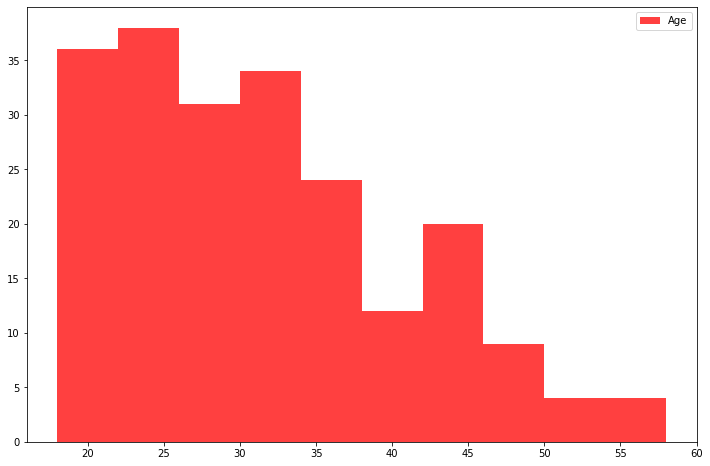

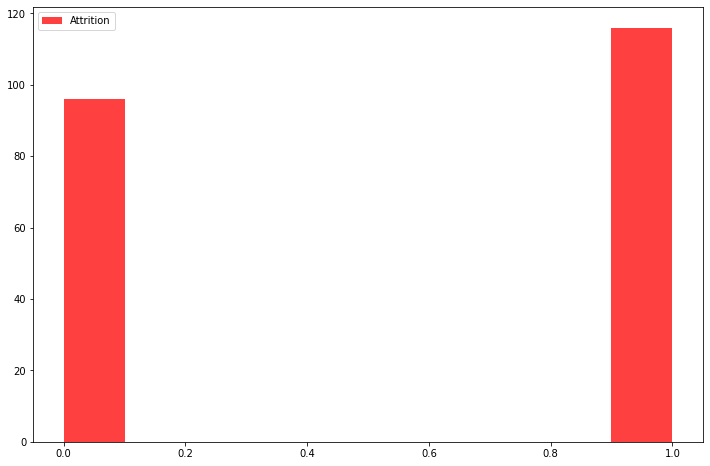

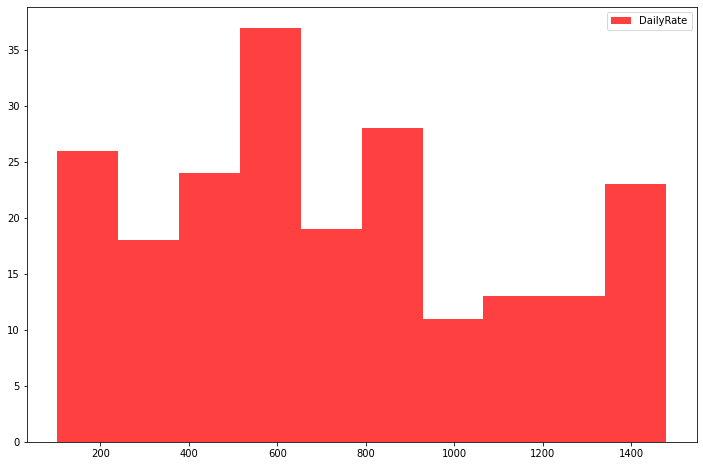

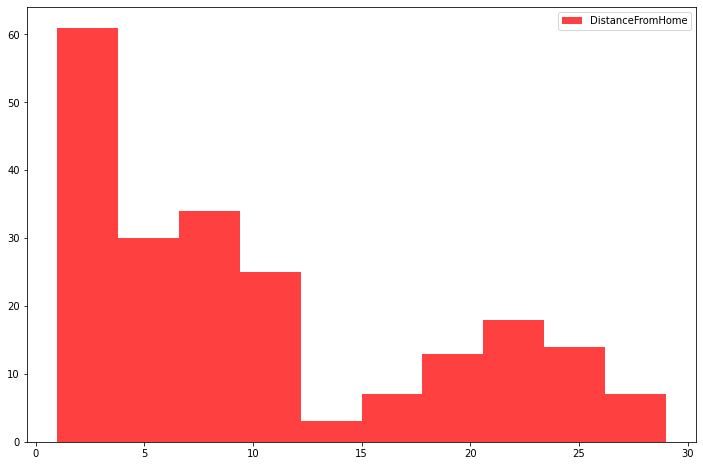

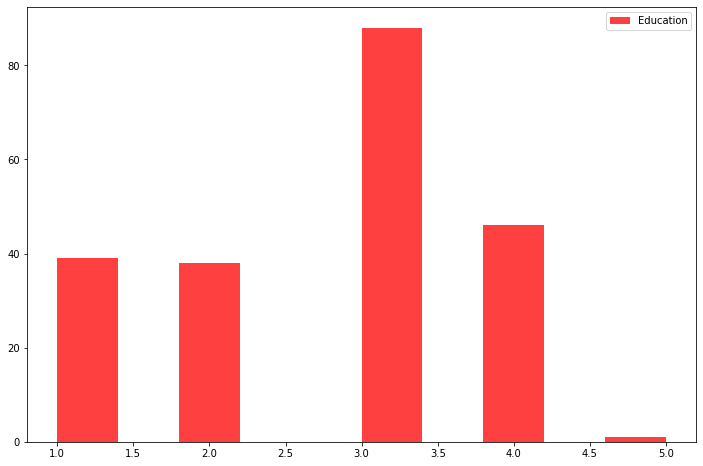

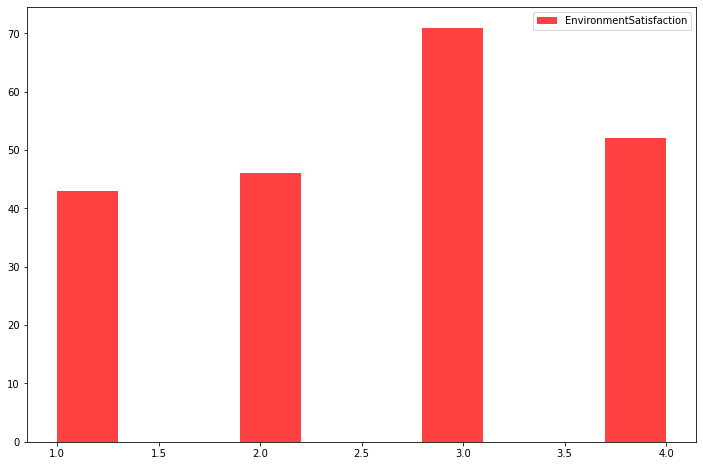

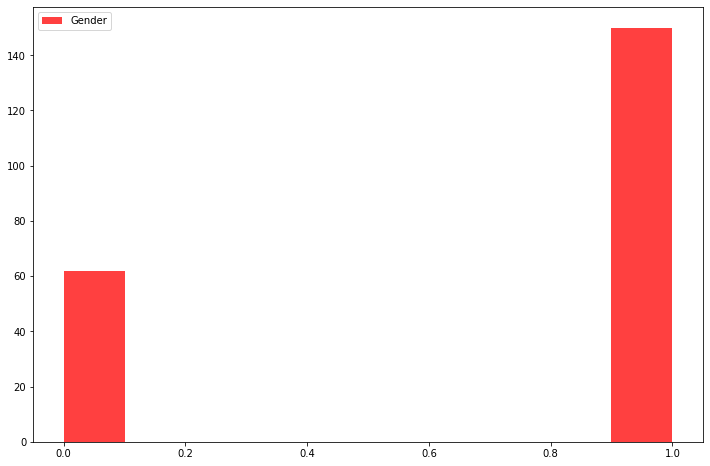

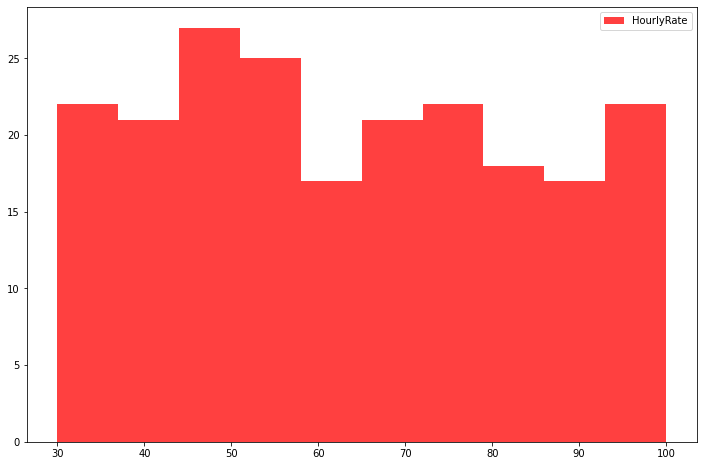

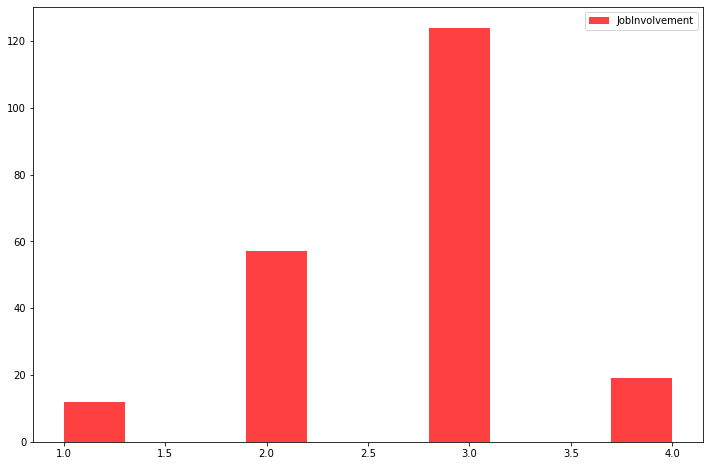

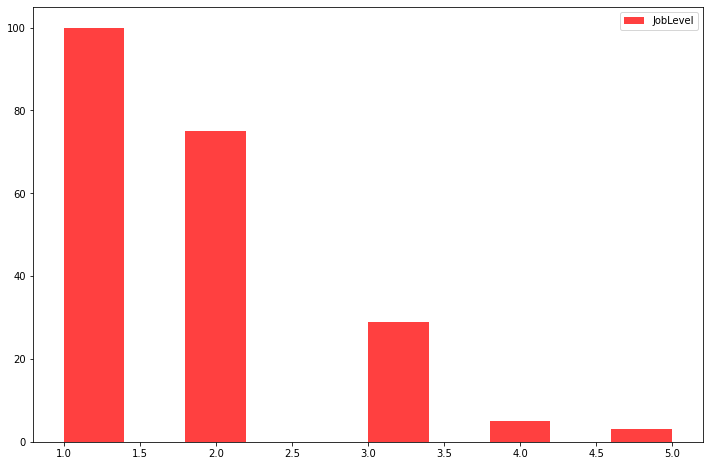

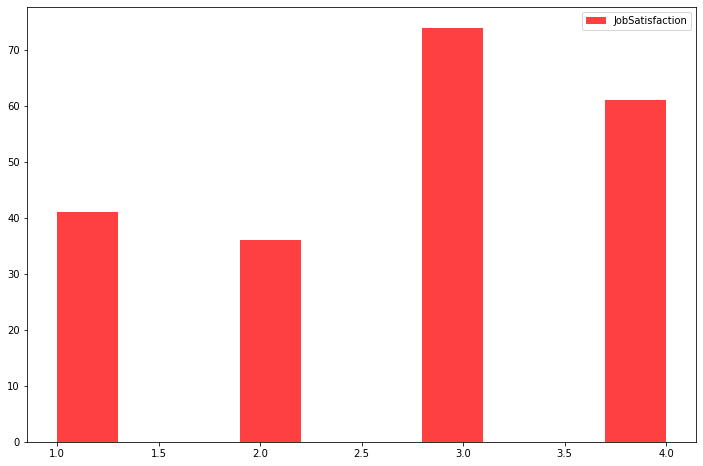

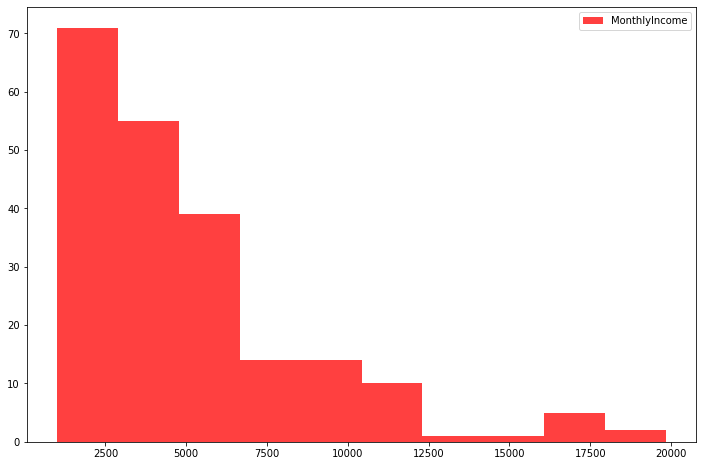

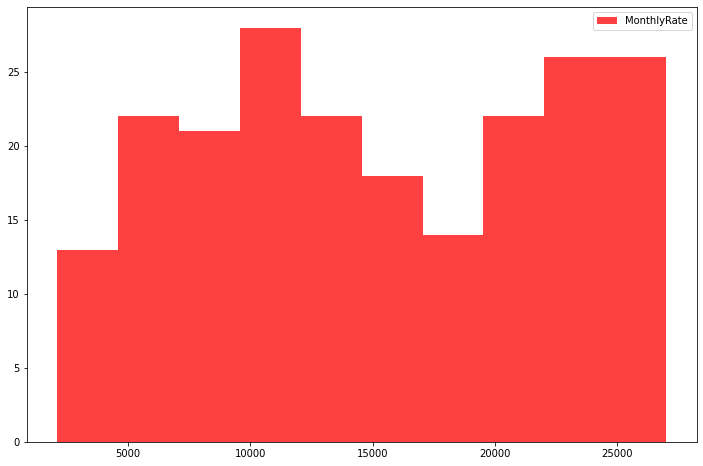

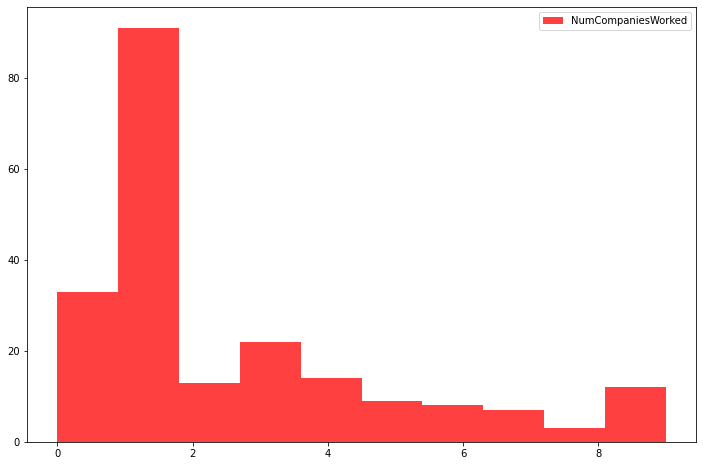

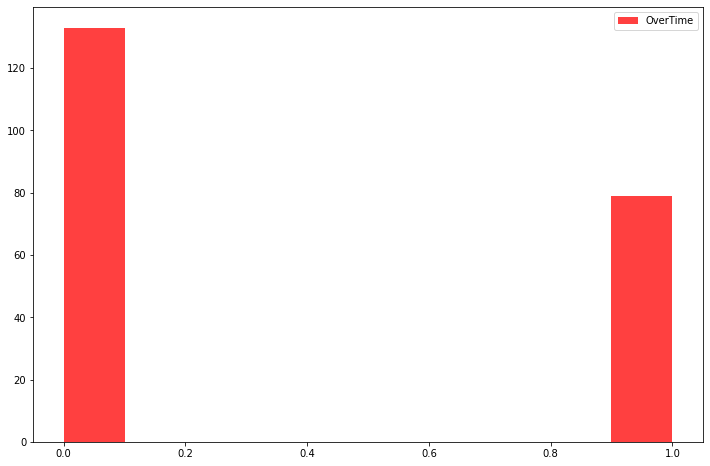

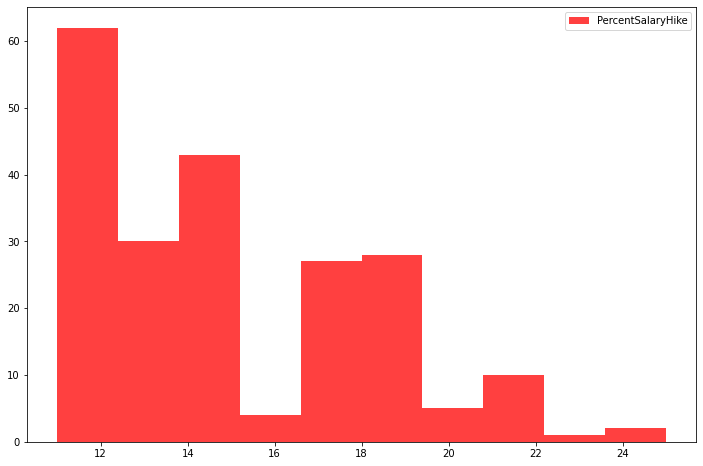

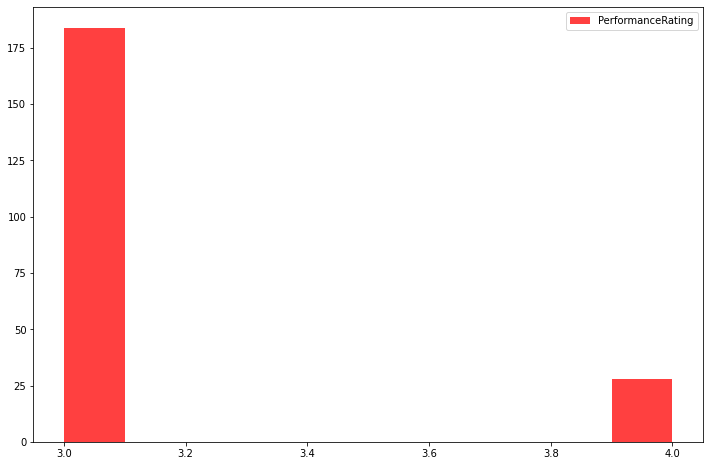

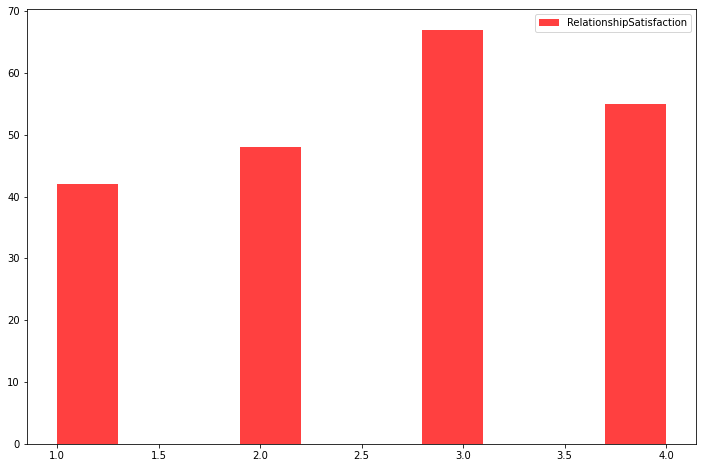

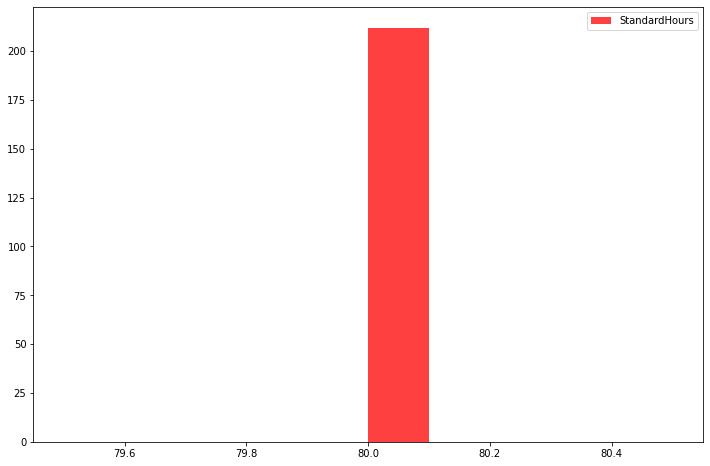

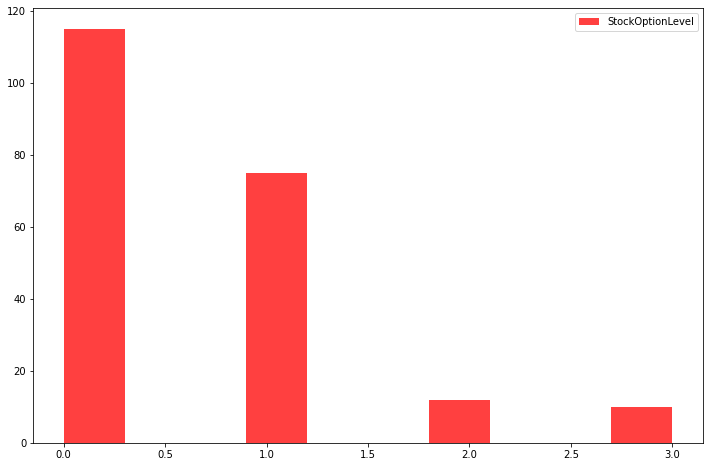

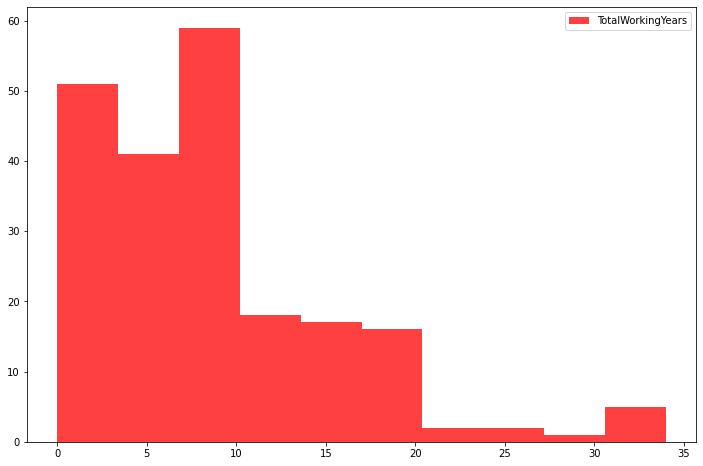

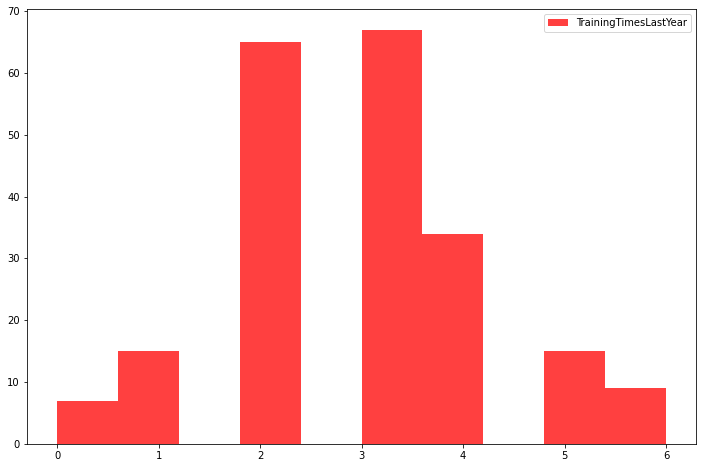

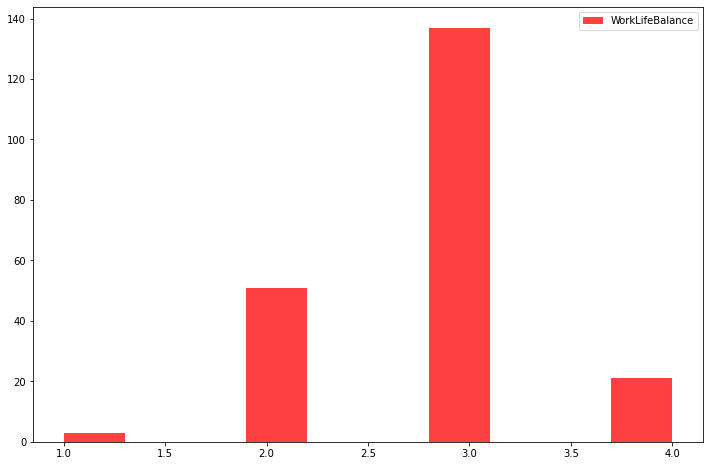

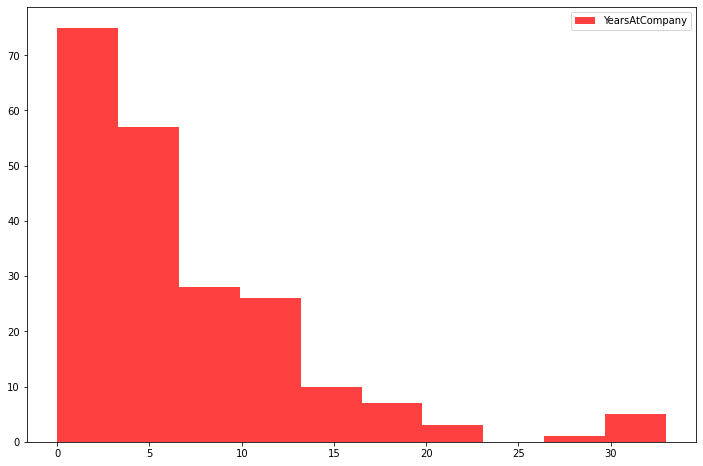

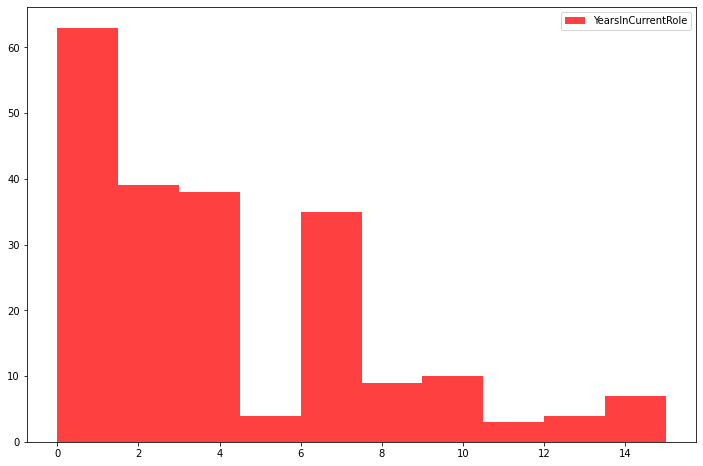

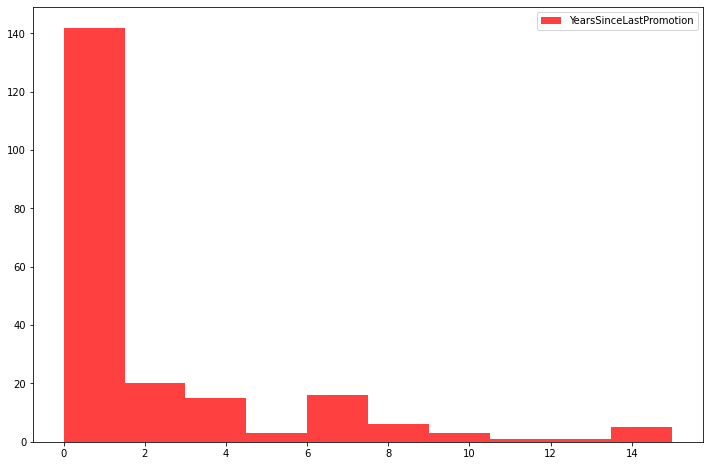

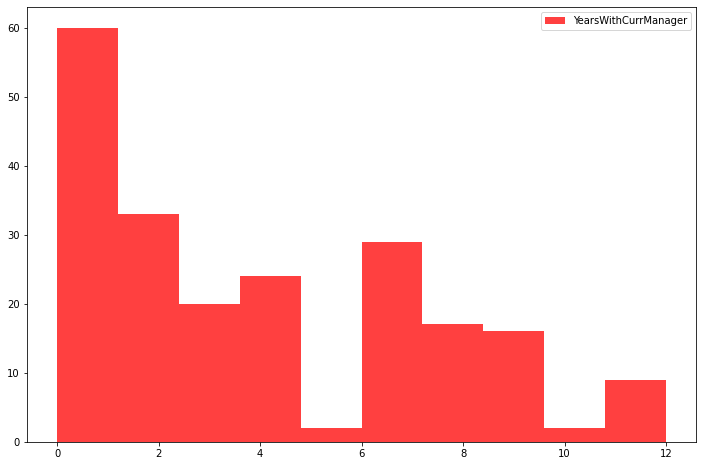

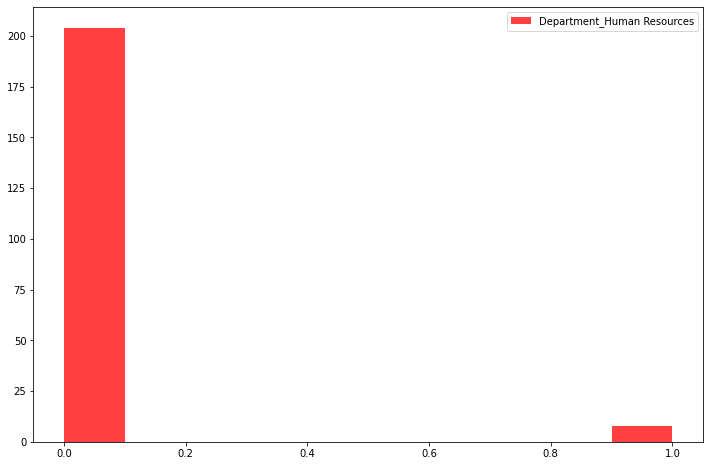

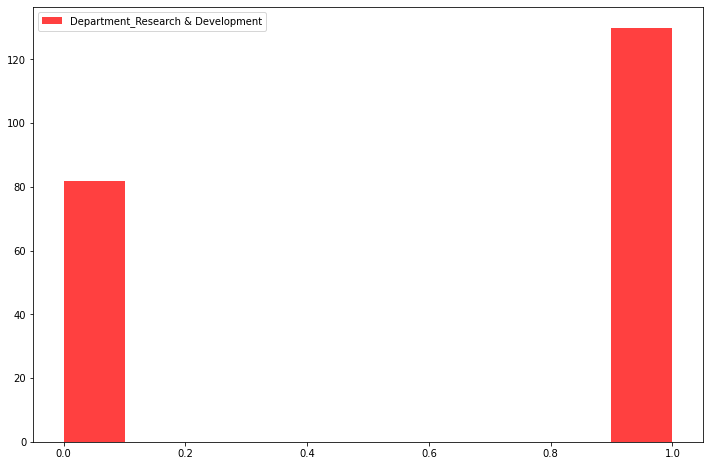

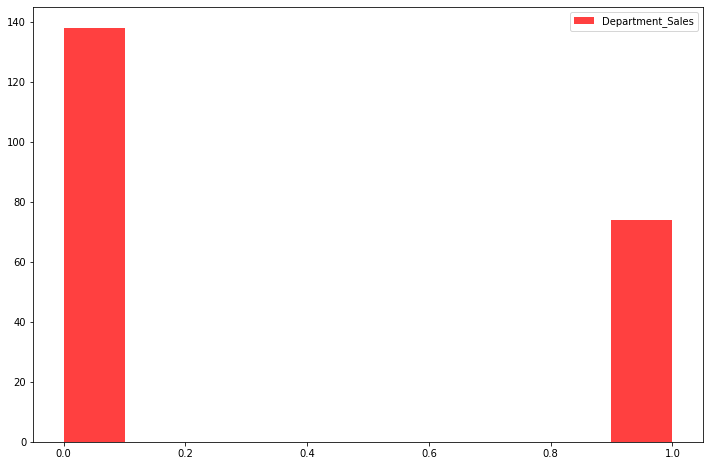

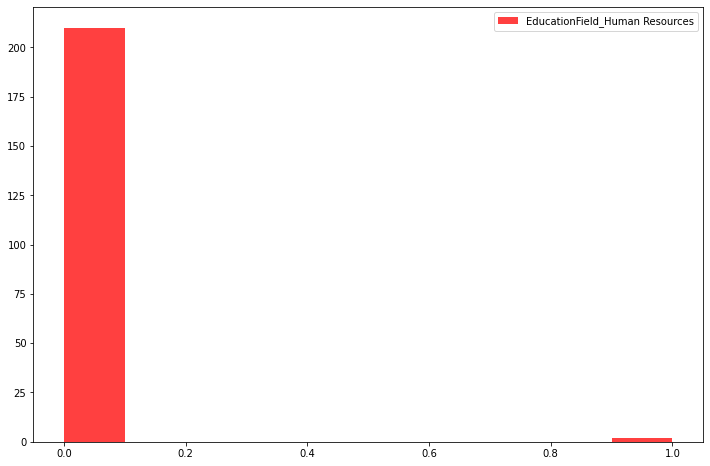

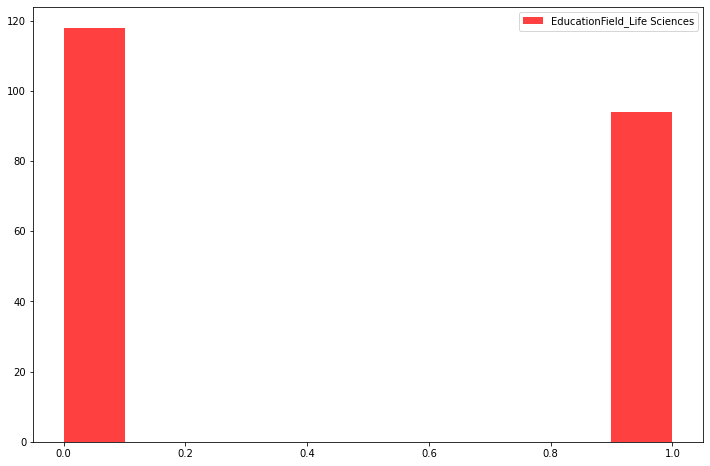

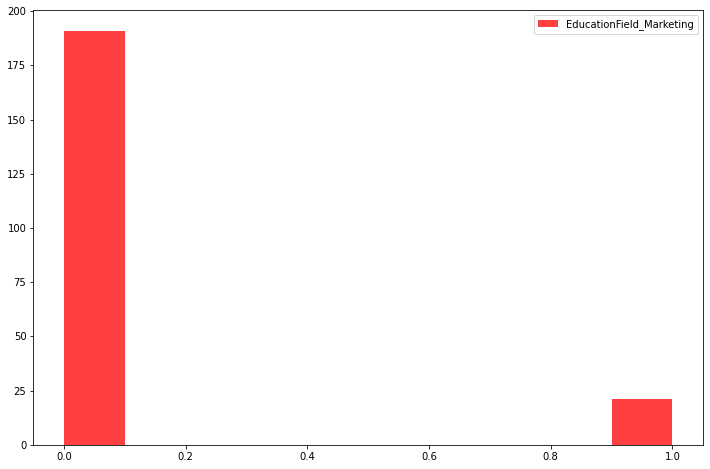

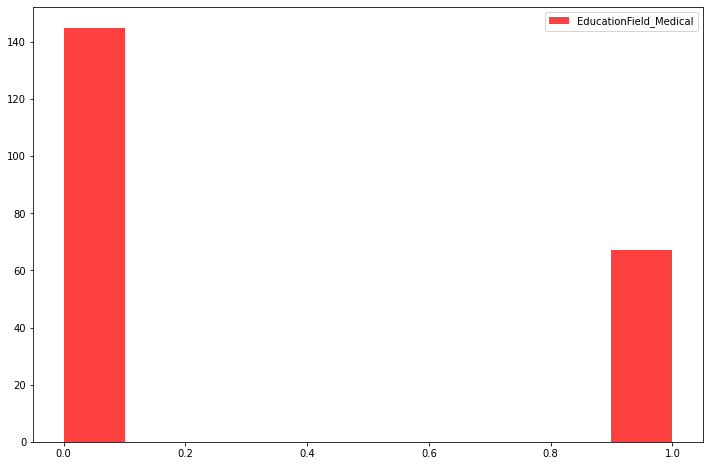

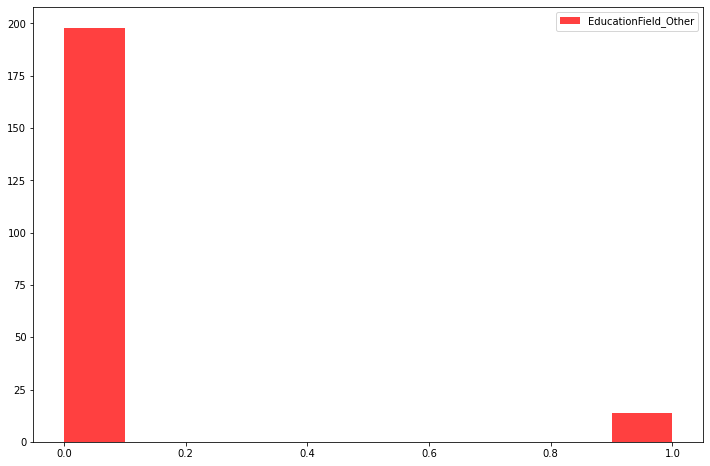

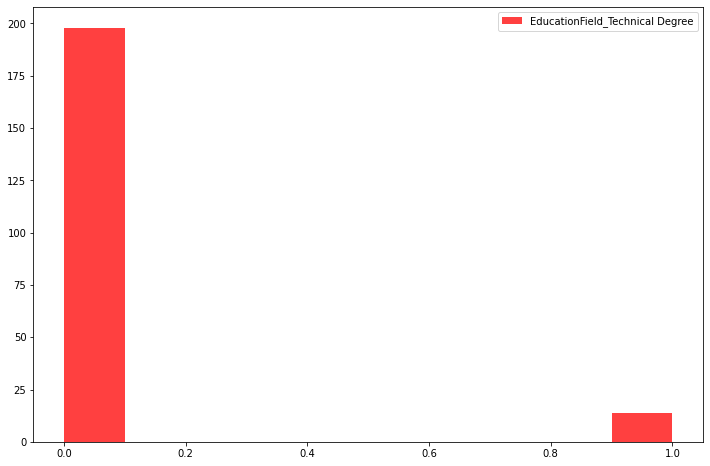

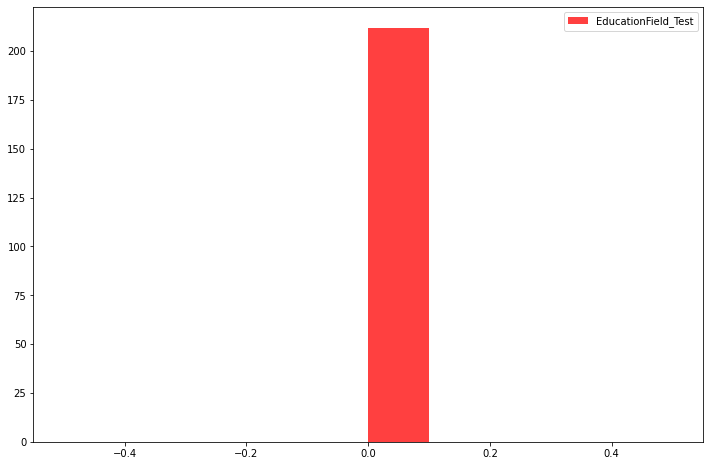

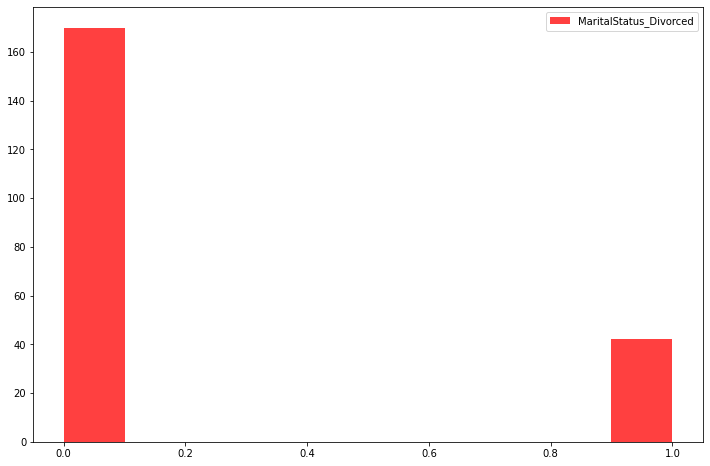

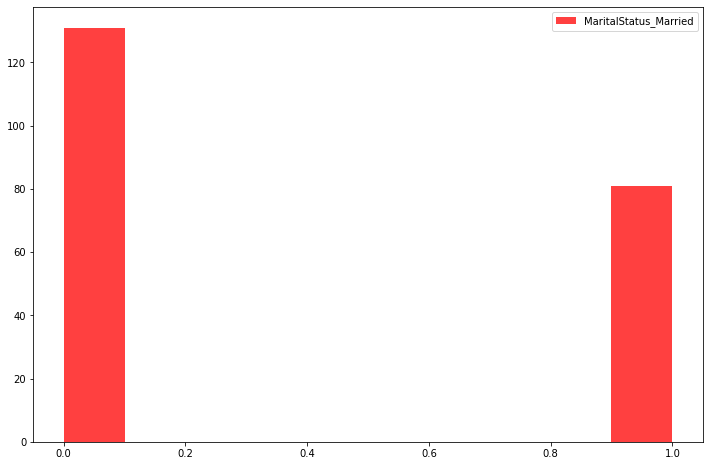

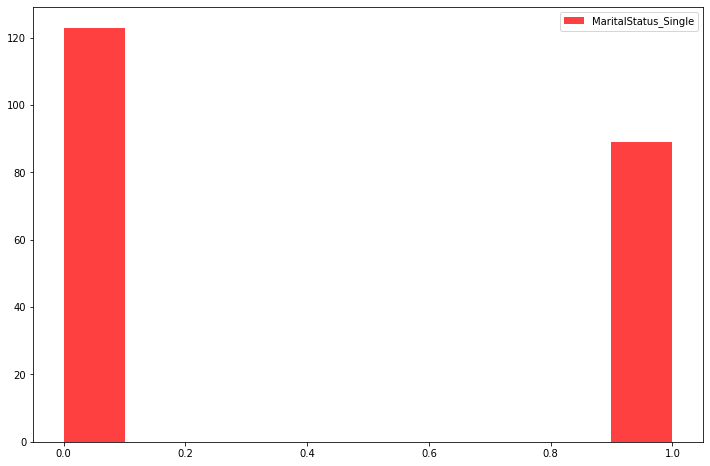

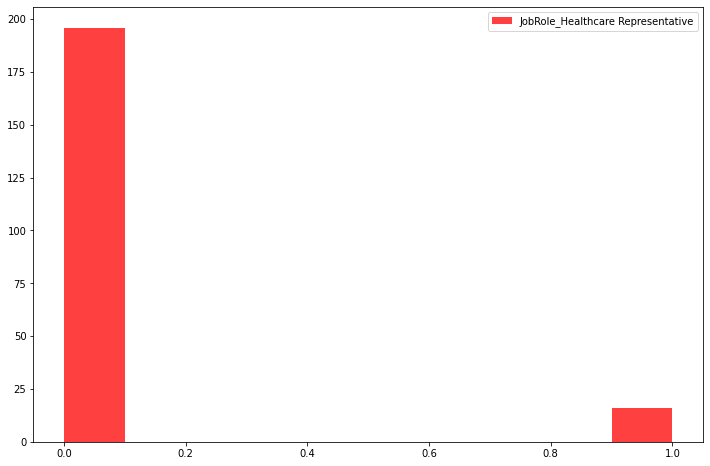

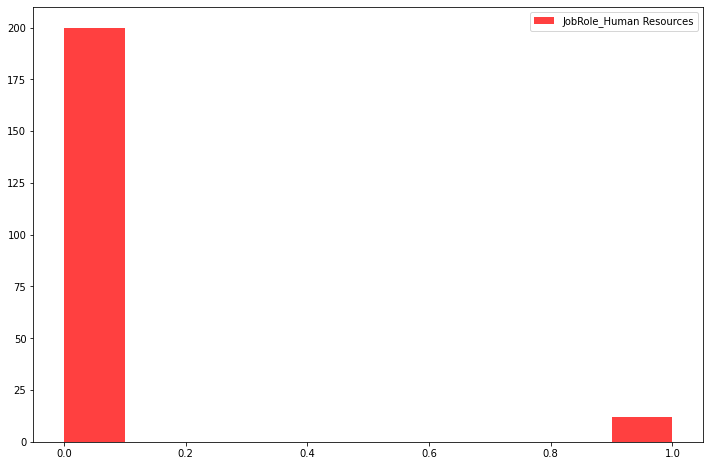

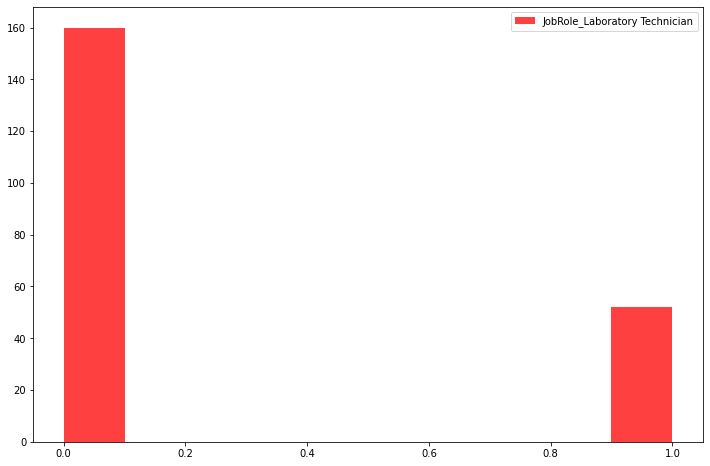

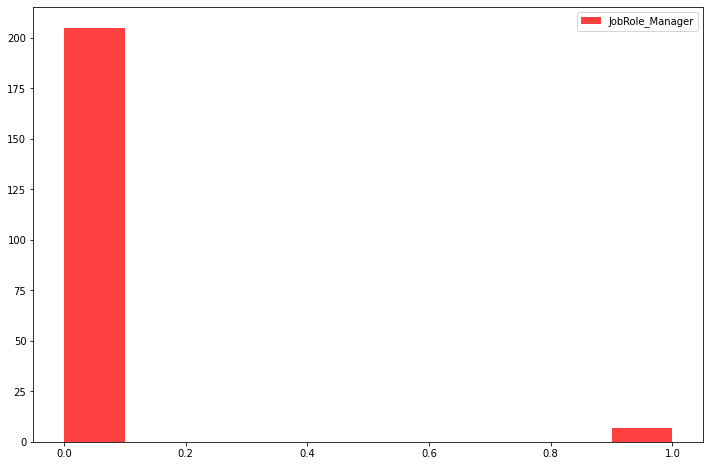

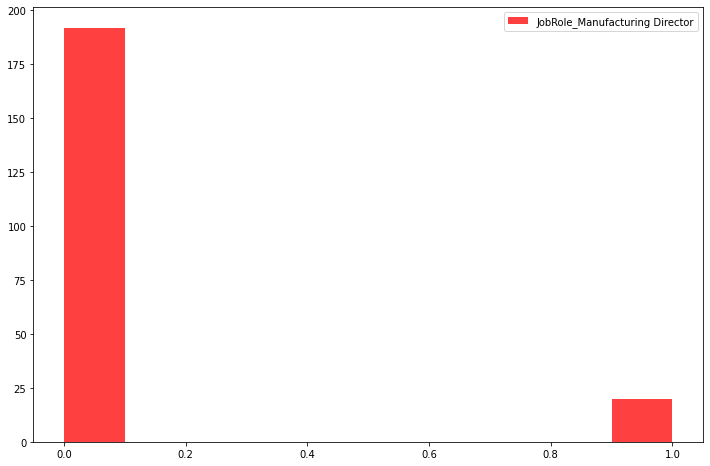

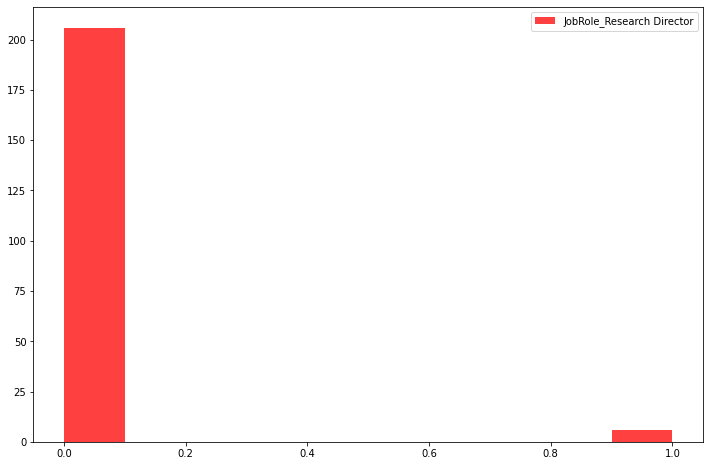

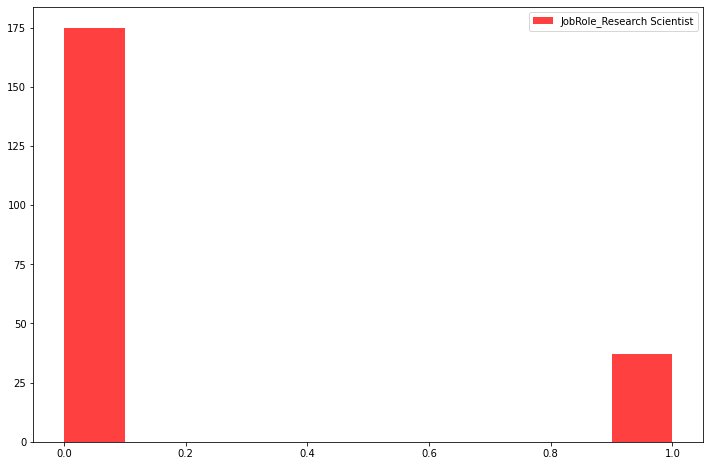

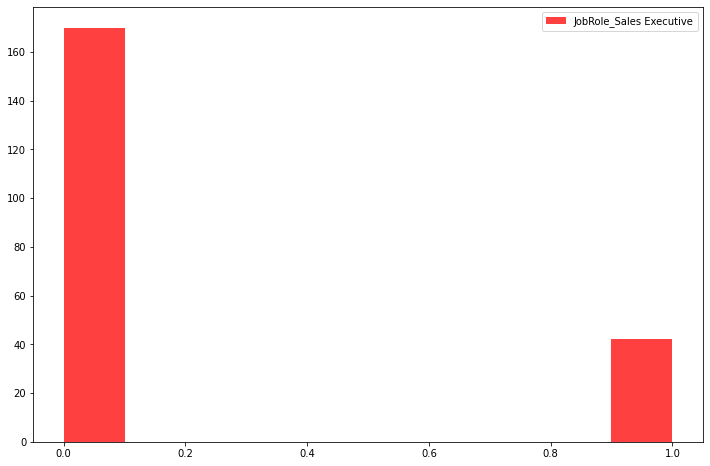

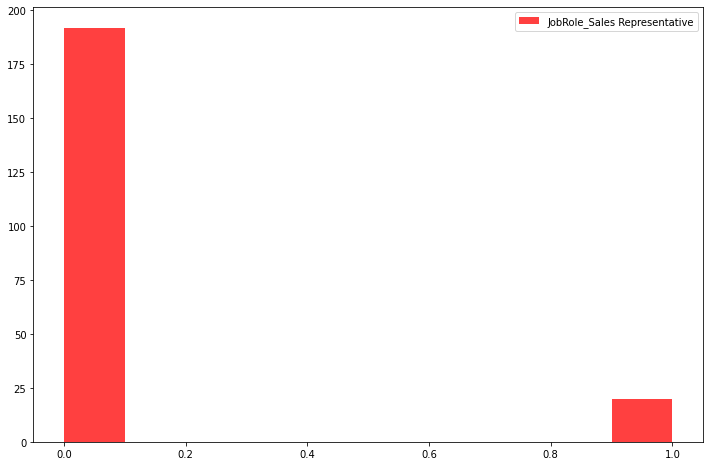

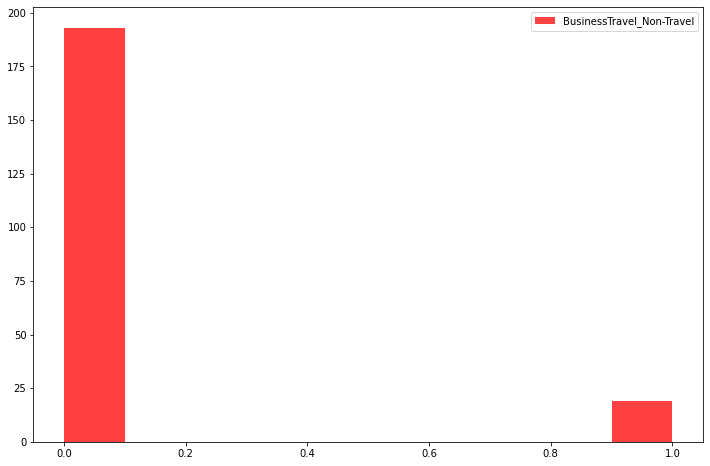

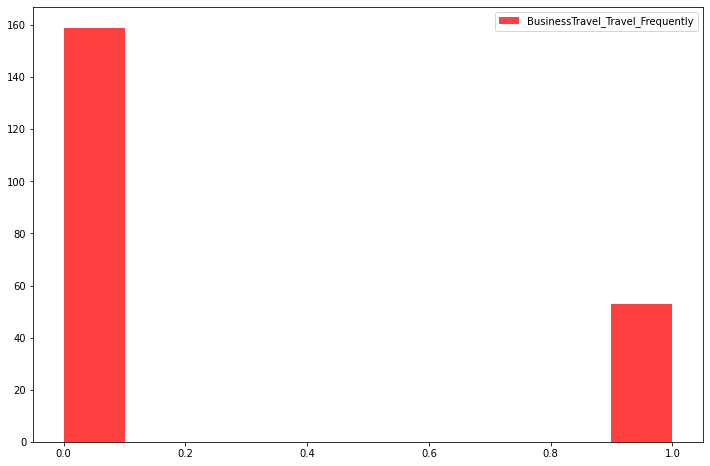

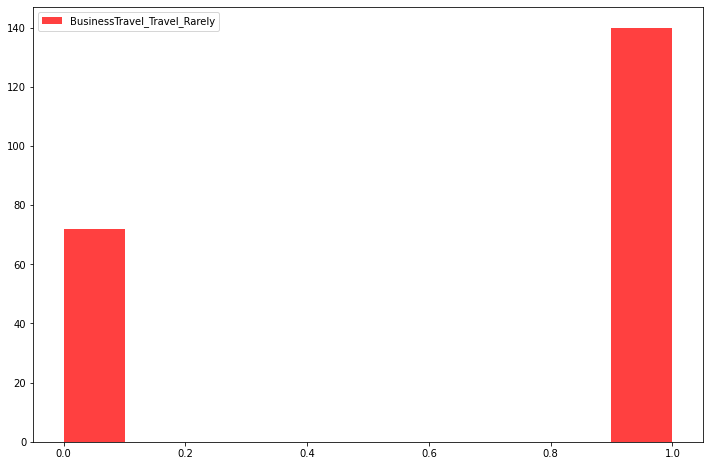

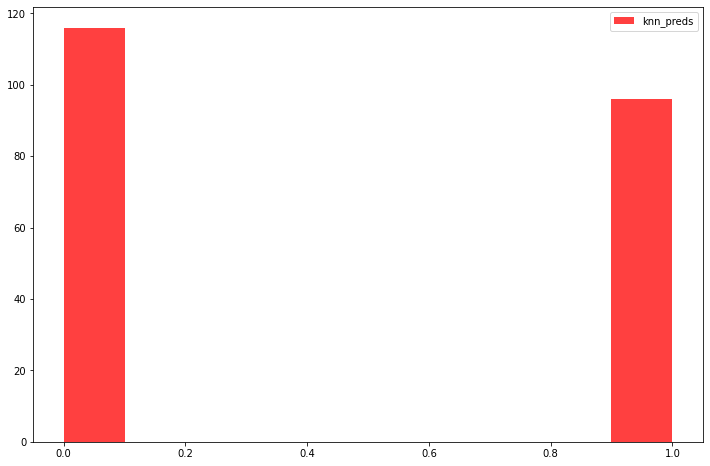

In [22]:
for col in dfwrong.columns:
  plt.figure(figsize=(12, 8))
  plt.hist(dfwrong[col], color='red', label=col, alpha=0.75)
  plt.legend()

In [23]:
dfwrong[(dfwrong['Department_Research & Development'] == 1)].shape[0]

130

In [24]:
percent = (dfwrong[(dfwrong['Department_Research & Development'] == 1)].shape[0] / test_df[(test_df['Department_Research & Development'] == 1)].shape[0]) * 100
print(f'Percent of research and dev that were wrong: {percent:.2f}')

percent = (dfwrong[(dfwrong['Department_Research & Development'] == 1)].shape[0] / dfwrong.shape[0]) * 100
print(f'Percent of wrong predictions that were research and dev: {percent:.2f}')

Percent of research and dev that were wrong: 8.29
Percent of wrong predictions that were research and dev: 61.32


In [25]:
dfwrong.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',

In [26]:
catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']
for col in catWrongCol:
  percent = (dfwrong[(dfwrong[col] == 1)].shape[0] / dfwrong.shape[0]) * 100
  if percent > 10 :
    print(f'Percent of wrong predictions that were {col}: {percent:.2f}')
    print('_____________________________')

Percent of wrong predictions that were Department_Research & Development: 61.32
_____________________________
Percent of wrong predictions that were Department_Sales: 34.91
_____________________________
Percent of wrong predictions that were EducationField_Life Sciences: 44.34
_____________________________
Percent of wrong predictions that were EducationField_Medical: 31.60
_____________________________
Percent of wrong predictions that were MaritalStatus_Divorced: 19.81
_____________________________
Percent of wrong predictions that were MaritalStatus_Married: 38.21
_____________________________
Percent of wrong predictions that were MaritalStatus_Single: 41.98
_____________________________
Percent of wrong predictions that were JobRole_Laboratory Technician: 24.53
_____________________________
Percent of wrong predictions that were JobRole_Research Scientist: 17.45
_____________________________
Percent of wrong predictions that were JobRole_Sales Executive: 19.81
____________________

In [27]:
dfWrongRD = (dfwrong[(dfwrong['Department_Research & Development'] == 1)])

(dfWrongRD[(dfWrongRD['knn_preds'] == 0)]).shape[0]


65

In [28]:
dfWrongRDPredictedLeft = (dfWrongRD[(dfWrongRD['knn_preds'] == 1)]).shape[0]
dfWrongRDPredictedLeft

65

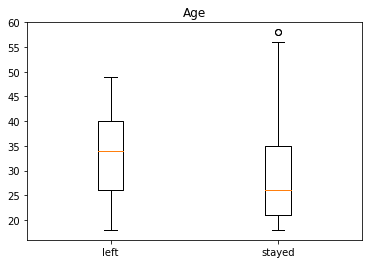

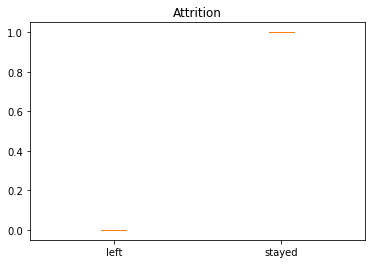

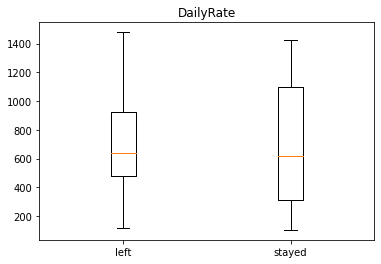

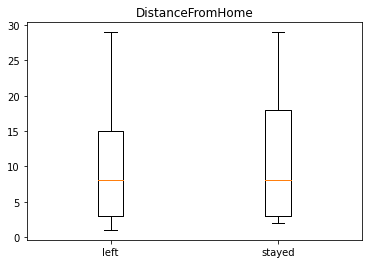

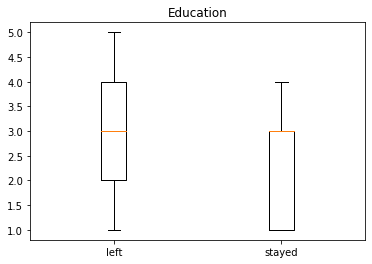

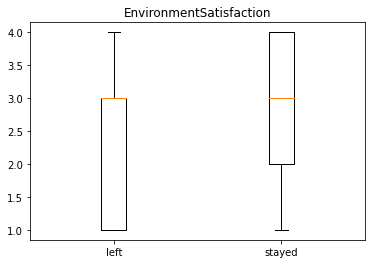

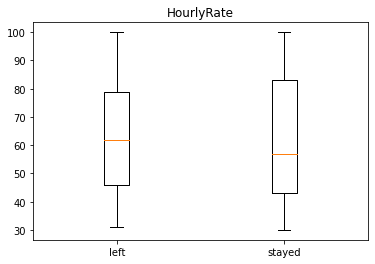

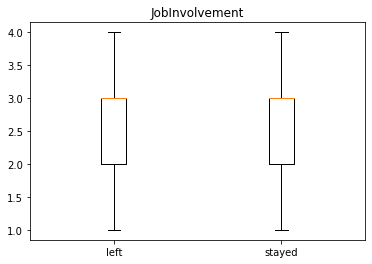

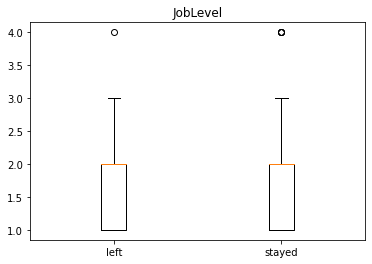

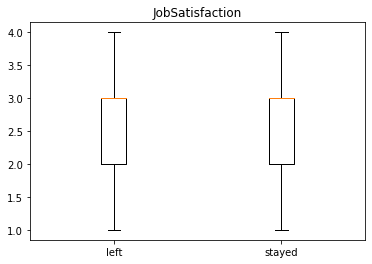

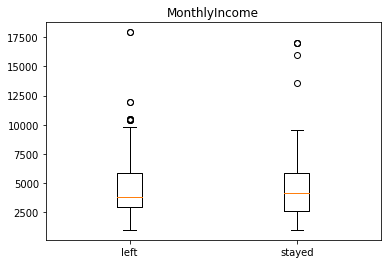

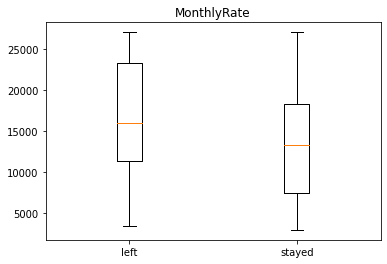

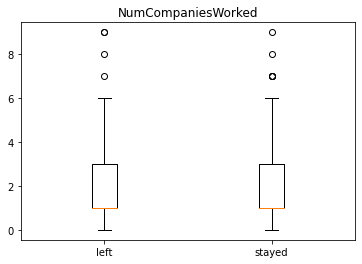

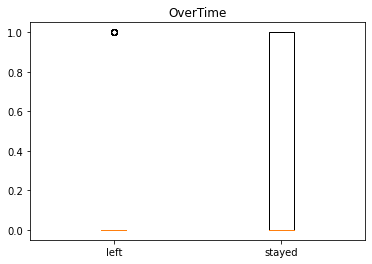

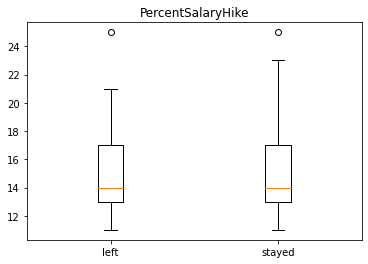

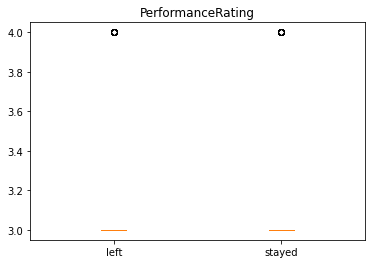

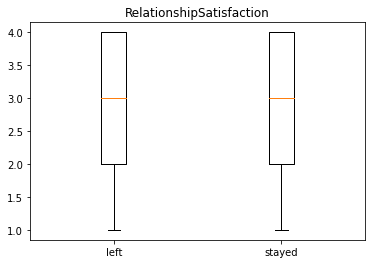

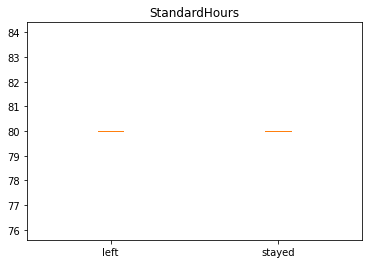

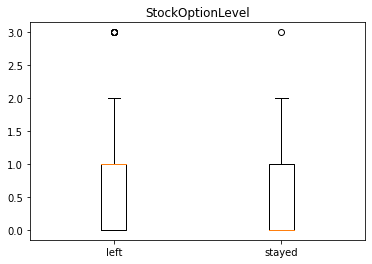

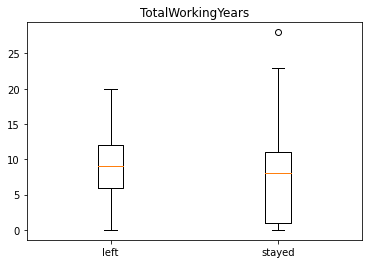

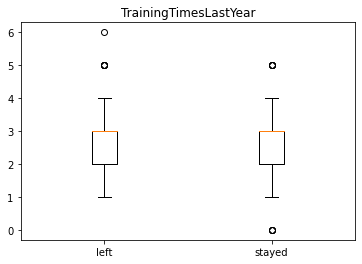

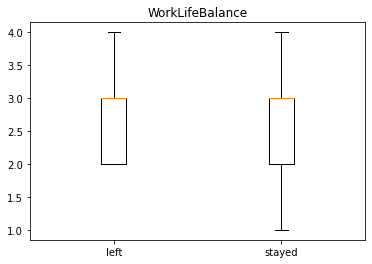

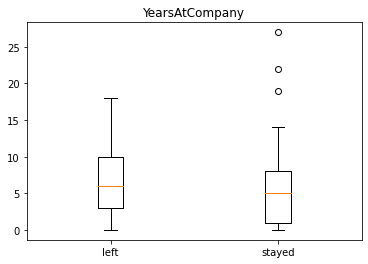

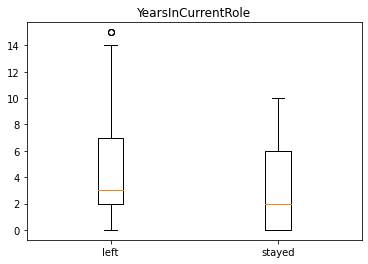

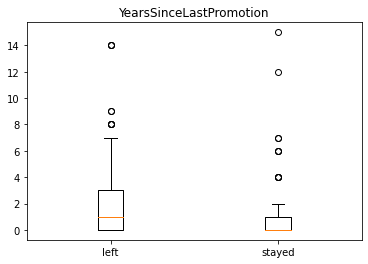

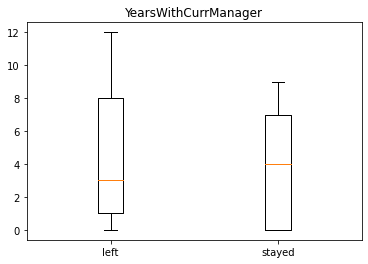

In [29]:
dfWrongRD = (dfwrong[(dfwrong['Department_Research & Development'] == 1)])

columnsall = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
dfWrongRDPredictedStayed = (dfWrongRD[(dfWrongRD['knn_preds'] == 0)])
dfWrongRDPredictedLeft = (dfWrongRD[(dfWrongRD['knn_preds'] == 1)])

for col in columnsall:
  left = dfWrongRDPredictedLeft[col]
  stayed = dfWrongRDPredictedStayed[col]
  data = [left, stayed]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['left', 'stayed'])
  plt.show()

In [30]:

catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']

for col in catWrongCol:
  if test_df[(test_df[col] == 1)].shape[0] > 0 :
    percent = (dfwrong[(dfwrong[col] == 1)].shape[0] / test_df[(test_df[col] == 1)].shape[0]) * 100
    if (percent > 9) & (dfwrong[(dfwrong[col] == 1)].shape[0] > 30):
      print(f'Percent of {col} that were wrong: {percent:.2f}')
      print('_____________________________')

Percent of Department_Sales that were wrong: 9.50
_____________________________
Percent of EducationField_Life Sciences that were wrong: 9.41
_____________________________
Percent of MaritalStatus_Single that were wrong: 11.10
_____________________________
Percent of JobRole_Laboratory Technician that were wrong: 11.85
_____________________________
Percent of BusinessTravel_Travel_Frequently that were wrong: 11.28
_____________________________


In [31]:
dfWrongLabTech = (dfwrong[(dfwrong['JobRole_Laboratory Technician'] == 1)])

columnsall = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
dfWrongLabTechPredictedStayed = (dfWrongLabTech[(dfWrongLabTech['knn_preds'] == 0)])
dfWrongLabTechPredictedLeft = (dfWrongLabTech[(dfWrongLabTech['knn_preds'] == 1)])

print(dfWrongLabTechPredictedStayed.shape[0])
print(dfWrongLabTechPredictedLeft.shape[0])

25
27


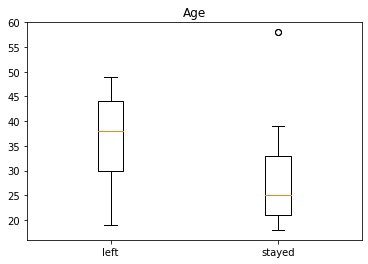

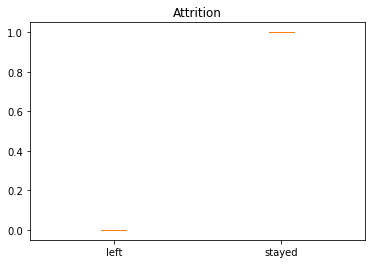

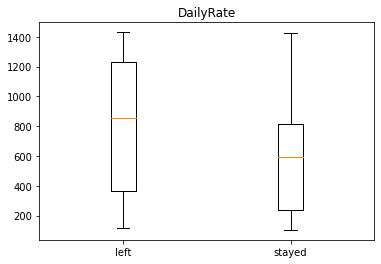

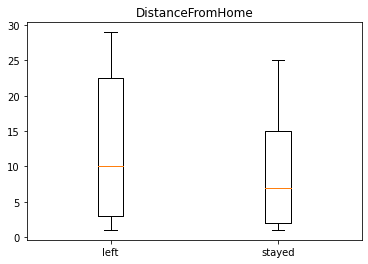

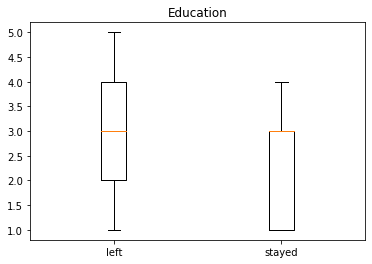

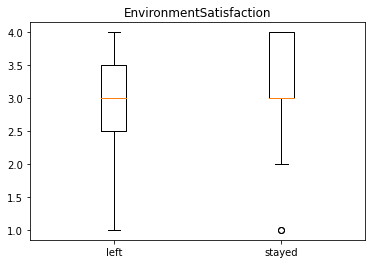

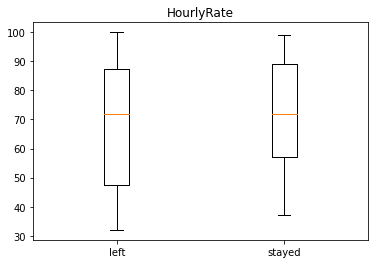

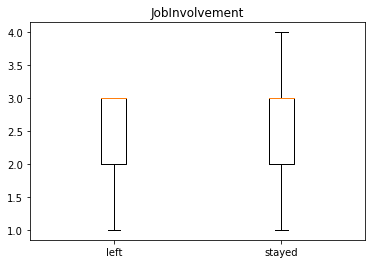

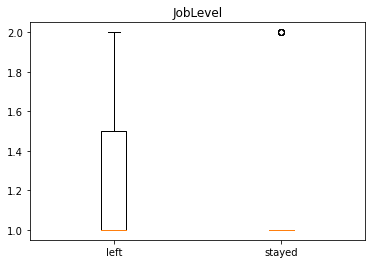

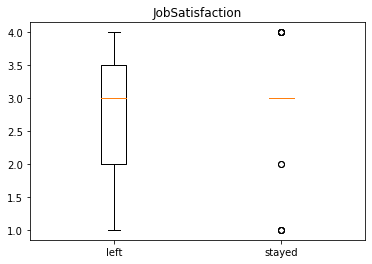

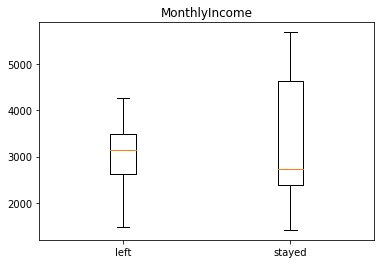

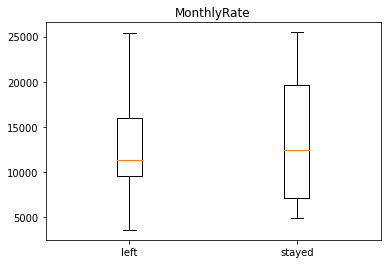

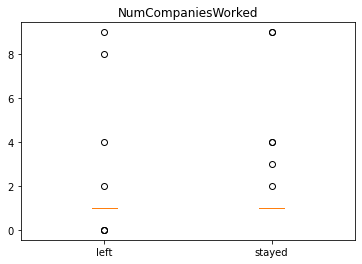

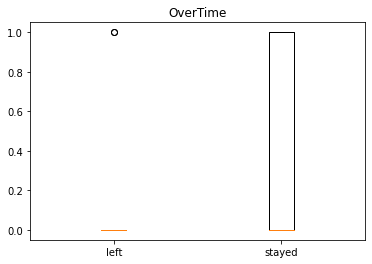

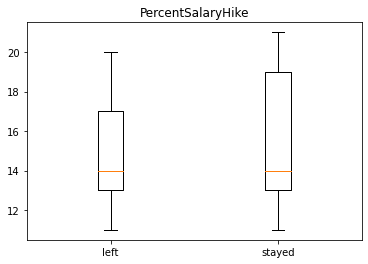

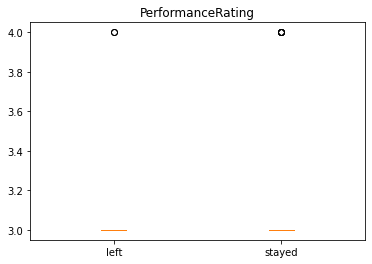

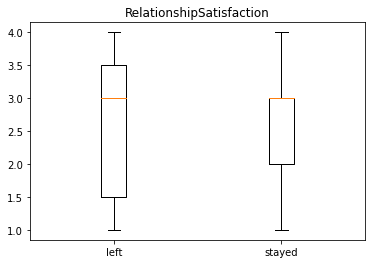

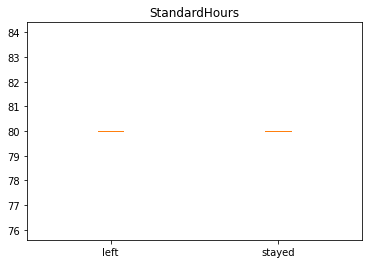

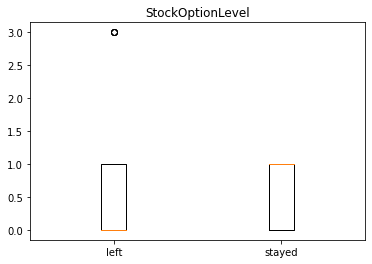

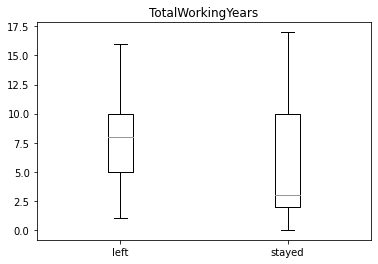

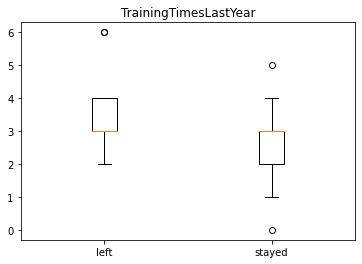

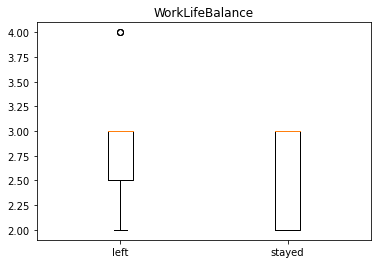

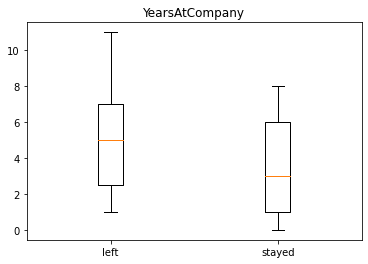

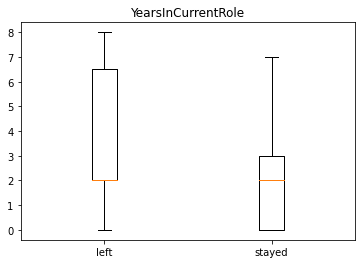

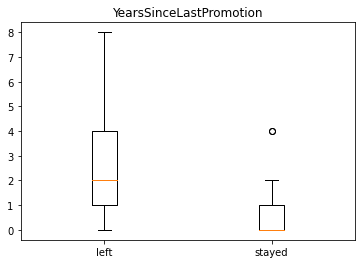

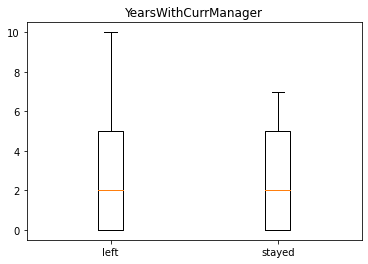

In [32]:
for col in columnsall:
  left = dfWrongLabTechPredictedLeft[col]
  stayed = dfWrongLabTechPredictedStayed[col]
  data = [left, stayed]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['left', 'stayed'])
  plt.show()

In [33]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',

In [ ]:
# Use a grid search with possible neighbors [1, 5, 10, 15, 20, 30] to find which number of neighbors is best. 
knn_clf = KNeighborsClassifier()
knn_params = {'n_neighbors': [1, 5, 10, 15, 20, 30],'metric': ['hamming', 'euclidean']}

grid_search_knn = GridSearchCV(knn_clf, knn_params)
grid_search_knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, grid_search_knn.predict(X_test))
y_pred_probaCV = grid_search_knn.predict_proba(X_test)[:,1]
test_df['knn_preds'] = y_pred_probaCV

# find which number of neighbors is best. 
grid_search_knn.best_params_

In [34]:
continuous_cols = ['Age', 'DailyRate', 'DistanceFromHome',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

categorical_cols = ['Department_Human Resources', 'Department_Research & Development', 'Education',
       'EnvironmentSatisfaction', 'Gender',  'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']

def make_distance_matrix(X, continuous_cols, categorical_cols):
  # Continuous columns
  from sklearn.metrics import DistanceMetric
  euc_dist = DistanceMetric.get_metric('euclidean')
  continuous_dist = euc_dist.pairwise(X[continuous_cols])

  # Categorical columns
  hamming_dist = DistanceMetric.get_metric('hamming')
  categorical_dist = hamming_dist.pairwise(X[categorical_cols])

  # Total distance
  X_dist = continuous_dist + categorical_dist

  return(X_dist)

# Fit your nn model
# Set metric to "precomputed" to tell it to use a distance matrix
knn = KNeighborsClassifier(n_neighbors=5, metric="precomputed")
# Make sure to use the distance matrix
X_train_dist = make_distance_matrix(X_train, continuous_cols, categorical_cols)

knn.fit(X_train_dist, y_train)

# Make predictions
X_test_dist = make_distance_matrix(X_test, continuous_cols, categorical_cols)
#knn.predict(X_test_dist)

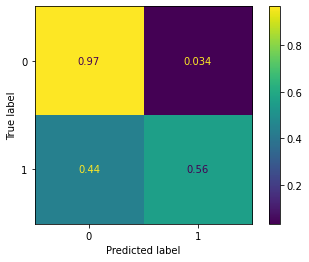

In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

xgb_clf = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=1e-3, n_jobs=-1)

xgb_clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_predictions(y_test, xgb_clf.predict(X_test), normalize='true')
plt.show()

In [36]:
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

test_df['predictions'] = y_pred_proba

dfwrong_false0 = test_df[test_df['Attrition'] == 1]
dfwrong_false0 = dfwrong_false0[(dfwrong_false0['predictions'] < 0.5)]
catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']
for col in catWrongCol:
  percent = (dfwrong_false0[(dfwrong_false0[col] == 1)].shape[0] / dfwrong_false0.shape[0]) * 100
  if percent > 10 :
    print(f'Percent of false 0 (stayed) that were {col}: {percent:.2f}')
    print('_____________________________')

Percent of false 0 (stayed) that were Department_Research & Development: 55.93
_____________________________
Percent of false 0 (stayed) that were Department_Sales: 38.98
_____________________________
Percent of false 0 (stayed) that were EducationField_Life Sciences: 39.55
_____________________________
Percent of false 0 (stayed) that were EducationField_Marketing: 11.86
_____________________________
Percent of false 0 (stayed) that were EducationField_Medical: 31.64
_____________________________
Percent of false 0 (stayed) that were EducationField_Technical Degree: 10.17
_____________________________
Percent of false 0 (stayed) that were MaritalStatus_Divorced: 22.03
_____________________________
Percent of false 0 (stayed) that were MaritalStatus_Married: 48.59
_____________________________
Percent of false 0 (stayed) that were MaritalStatus_Single: 29.38
_____________________________
Percent of false 0 (stayed) that were JobRole_Laboratory Technician: 19.77
________________________

In [54]:
test_df[test_df['Attrition'] == 1].shape[0] / test_df[test_df['Attrition'] == 0].shape[0]

0.195906432748538

In [37]:
dfwrong_false0

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,knn_preds,predictions
13486,46.0,1,261.0,21.0,2.0,4.0,0,66,3,2,...,0,0,0,0,0,0,0,1,1.0,0.460706
16874,44.0,1,920.0,24.0,3.0,4.0,1,43,3,1,...,0,0,0,0,0,0,1,0,1.0,0.457033
6784,25.0,1,688.0,3.0,3.0,3.0,0,78,3,3,...,0,0,0,0,0,0,0,1,1.0,0.458017
19454,22.0,1,617.0,3.0,1.0,2.0,0,34,3,2,...,1,0,0,0,0,0,0,1,0.0,0.458208
3240,39.0,1,1162.0,3.0,2.0,4.0,0,41,3,2,...,0,0,0,1,0,0,0,1,1.0,0.485404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,36.0,1,1456.0,13.0,5.0,3.0,0,71,2,3,...,0,0,0,1,0,0,0,1,1.0,0.462278
21613,49.0,1,1184.0,11.0,3.0,3.0,0,68,3,2,...,0,0,0,1,0,0,0,1,0.0,0.491574
6712,25.0,1,240.0,5.0,3.0,2.0,1,93,3,1,...,0,0,0,0,0,0,0,1,0.0,0.486272
17603,45.0,1,1449.0,1.0,1.0,1.0,1,45,2,2,...,1,0,0,0,0,0,0,1,0.0,0.456203


In [38]:
X_train.shape[0]

5725

In [39]:
X_test.shape[0]

2454

In [40]:
#take df and balance by attrition
def balanceDf(dfToBalance):
  rows = dfToBalance[(dfToBalance['Attrition'] == 1)].shape[0]
  dfResigned = dfToBalance[(dfToBalance['Attrition'] == 1)]
  dfCurrent = dfToBalance[(dfToBalance['Attrition'] == 0 )]
  dfCurrent = dfCurrent.sample(n = rows)

  assert dfResigned.shape[0] == dfCurrent.shape[0]

  dfBalanced = pd.concat([dfResigned, dfCurrent], axis=0)
  return dfBalanced

In [41]:
df_balanced = balanceDf(df)

In [42]:
balanced_train_df, balanced_test_df = train_test_split(df_balanced, train_size=0.7)

balanced_X_train = balanced_train_df.drop('Attrition', axis=1)
balanced_y_train = balanced_train_df['Attrition']

balanced_X_test = balanced_test_df.drop('Attrition', axis=1)
balanced_y_test = balanced_test_df['Attrition']

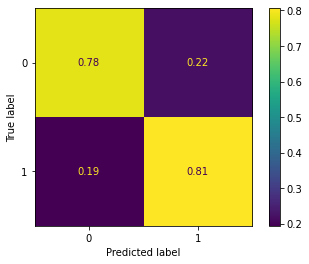

In [43]:
xgb_clf_balanced = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=1e-3, n_jobs=-1)

xgb_clf_balanced.fit(balanced_X_train, balanced_y_train)

ConfusionMatrixDisplay.from_predictions(balanced_y_test, xgb_clf_balanced.predict(balanced_X_test), normalize='true')
plt.show()

In [44]:
balanced_train_df.shape[0]

1875

In [45]:
y_pred_proba = xgb_clf_balanced.predict_proba(balanced_X_test)[:,1]

balanced_test_df['predictions'] = y_pred_proba

dfwrong2 = balanced_test_df[balanced_test_df['Attrition'] != balanced_test_df['predictions']]
catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']
for col in catWrongCol:
  percent = (dfwrong2[(dfwrong2[col] == 1)].shape[0] / dfwrong2.shape[0]) * 100
  if percent > 10 :
    print(f'Percent of wrong predictions that were {col}: {percent:.2f}')
    print('_____________________________')

Percent of wrong predictions that were Department_Research & Development: 62.48
_____________________________
Percent of wrong predictions that were Department_Sales: 32.67
_____________________________
Percent of wrong predictions that were EducationField_Life Sciences: 39.01
_____________________________
Percent of wrong predictions that were EducationField_Medical: 32.80
_____________________________
Percent of wrong predictions that were EducationField_Technical Degree: 11.18
_____________________________
Percent of wrong predictions that were MaritalStatus_Divorced: 18.63
_____________________________
Percent of wrong predictions that were MaritalStatus_Married: 42.73
_____________________________
Percent of wrong predictions that were MaritalStatus_Single: 38.63
_____________________________
Percent of wrong predictions that were JobRole_Laboratory Technician: 19.75
_____________________________
Percent of wrong predictions that were JobRole_Manufacturing Director: 10.31
________

In [46]:
dfwrong2 = balanced_test_df[balanced_test_df['Attrition'] != balanced_test_df['predictions']]


In [ ]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier([('logr', logr), ('dtc', dtc_grid_search.best_estimator_), ('knn', knn_grid_search.best_estimator_)], voting='soft')
vote_clf.fit(X_train_clf, y_train_clf)
vote_clf.predict(X_test_clf)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_clf, vote_clf.predict(X_test_clf))